## Atividade Avaliativa 1B
Nesta atividade você deve usar o dataset Energy Production.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### Questão 1
Atribua uma frequência aos dataframe.

In [2]:
df.index.freq = 'MS'

### Questão 2
Plote o dataset.

<Axes: xlabel='DATE'>

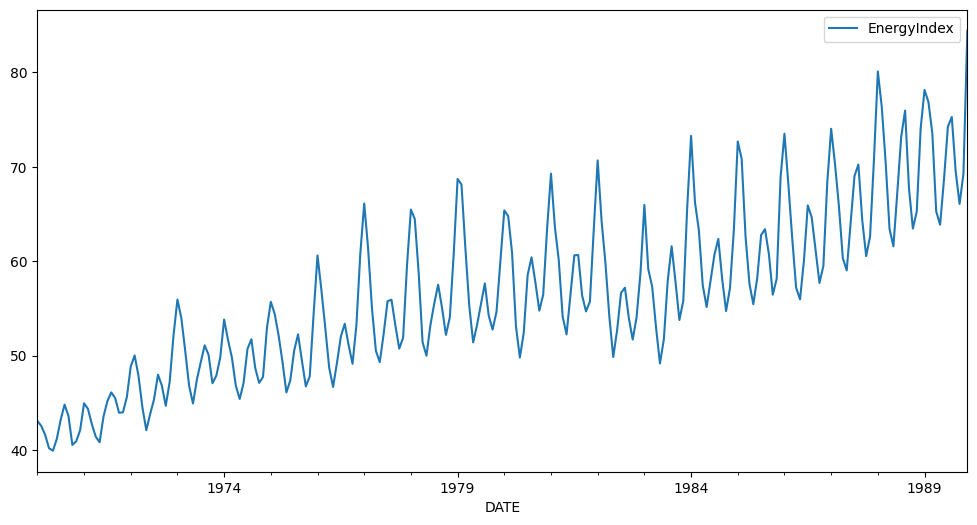

In [3]:
df.plot(figsize=(12,6))

### Questão 3
Adicione uma coluna que exiba a MMS de 12 meses. Em seguida, plote o resultado juntamento com os dados reais.


<Axes: xlabel='DATE'>

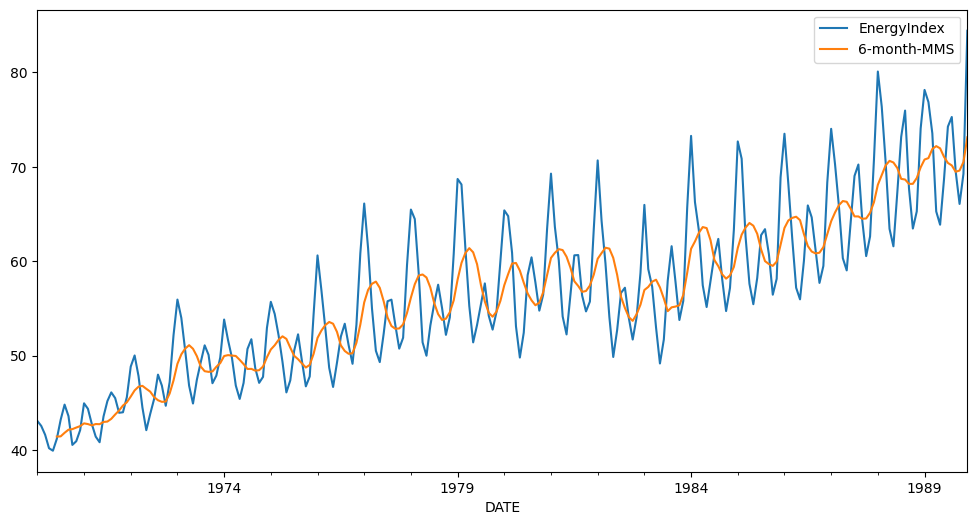

In [4]:
df['6-month-MMS'] = df['EnergyIndex'].rolling(window=6).mean()
df.plot(figsize=(12,6))

### Questão 4
Adicione uma coluna que exiba a MME com span=12. Use a função <tt>SimpleExpSmoothing</tt>. Em seguida, plote o resultado contendo a MMS, a MME e os dados reais.


<Axes: xlabel='DATE'>

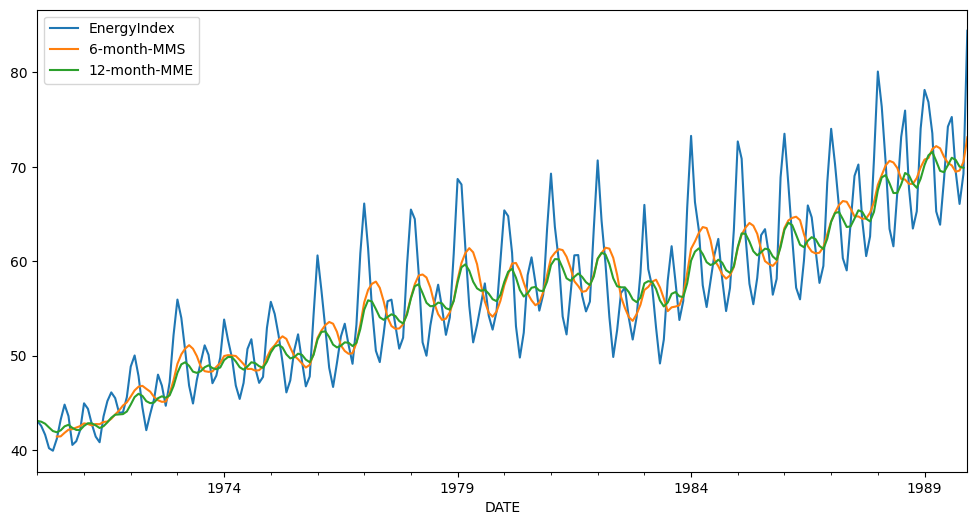

In [5]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df['12-month-MME'] = df['EnergyIndex'].ewm(span=12 , adjust=False).mean()
df['12-month-MME'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=(2/13) , optimized=False).fittedvalues.shift(-1)

df.plot(figsize=(12,6))

### Questão 5
Adicione uma coluna que mostre o modelo Holt-Winters (fitted model) usando Suavização Exponencial Tripla com opção *mul*. Plote o resultado.

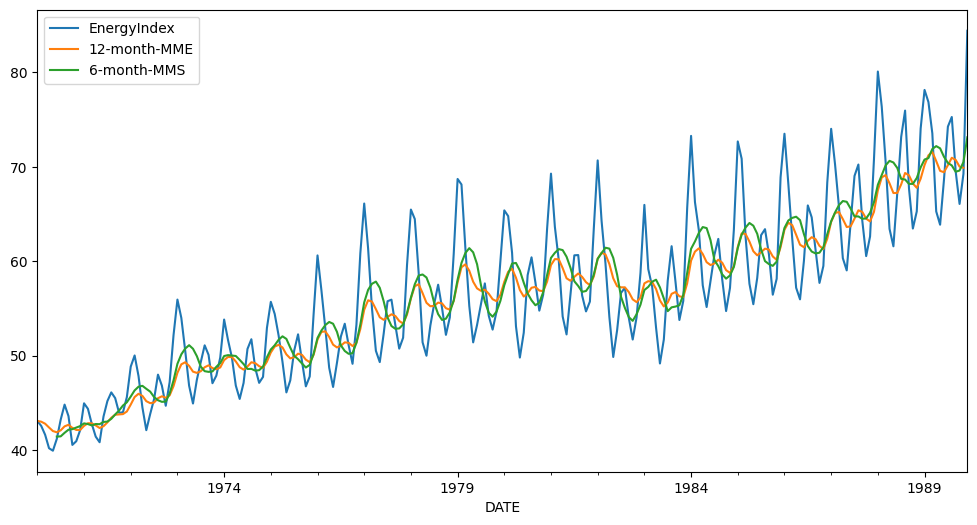

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['SEDmul12'] = ExponentialSmoothing(df['EnergyIndex'] , trend='mul').fit().fittedvalues.shift(-1)
df[['EnergyIndex' , '12-month-MME' , '6-month-MMS']].plot(figsize=(12,6)).autoscale(axis='x' , tight=True)

### Questão 6
Plote o resultado anterior para os 2 últimos anos.

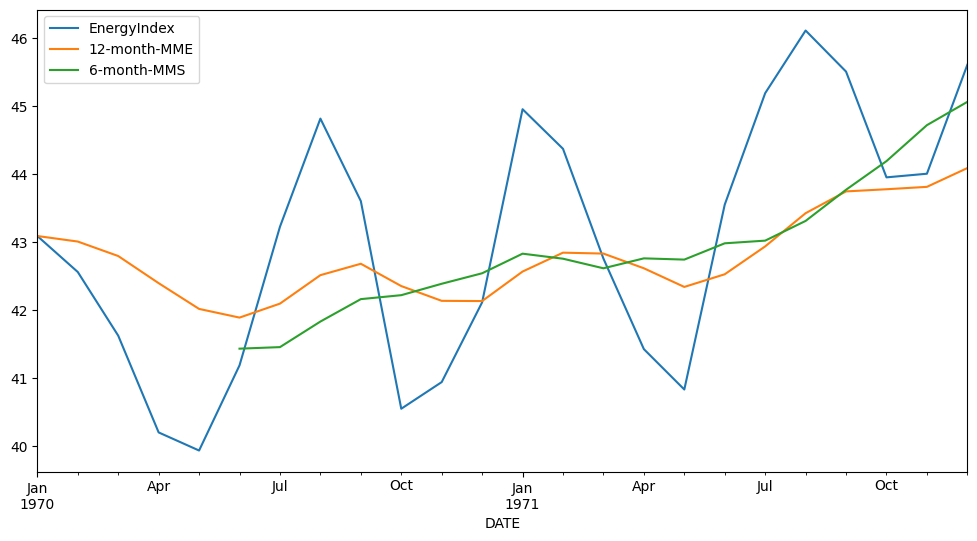

In [7]:
df['SEDmul12'] = ExponentialSmoothing(df['EnergyIndex'] , trend='mul').fit().fittedvalues.shift(-1)

df[['EnergyIndex' , '12-month-MME' , '6-month-MMS']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x' , tight=True)